In [3]:
import xarray as xr

In [2]:
pip install xarray

  Obtaining dependency information for xarray from https://files.pythonhosted.org/packages/a9/b7/9830def68e5575a24ca6d6f46b285d35ed27860beaa4f72848cd82870253/xarray-2024.10.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 348.4 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netcdf4

  Obtaining dependency information for netcdf4 from https://files.pythonhosted.org/packages/a0/d8/b7079ecbab35f7c95ab27e5146fa91daf0e39ba76093f0fc1187fc748749/netCDF4-1.7.2-cp311-cp311-macosx_12_0_x86_64.whl.metadata
  Obtaining dependency information for cftime from https://files.pythonhosted.org/packages/85/e6/6a7d2120fcffee208cf637d22b0d8f2701d91f69f68a96940056429950f3/cftime-1.6.4.post1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 348.3 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 343.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
ds = xr.open_dataset("11_frost_days-reanalysis-yearly-grid-1940-2023-v1.0.nc", engine="netcdf4")

In [17]:
ds

<xarray.Dataset> Size: 34MB
Dimensions:      (time: 84, lat: 185, lon: 271)
Coordinates:
  * time         (time) datetime64[ns] 672B 1940-01-01 1941-01-01 ... 2023-01-01
    realization  int64 8B ...
  * lat          (lat) float64 1kB 26.5 26.75 27.0 27.25 ... 72.0 72.25 72.5
  * lon          (lon) float64 2kB -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
Data variables:
    t2m          (time, lat, lon) int64 34MB ...

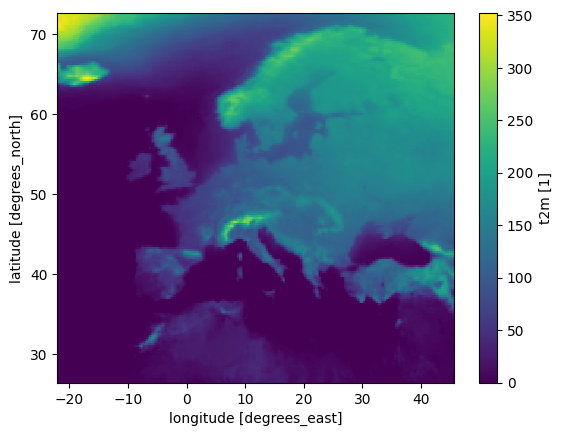

In [19]:
import matplotlib.pyplot as plt


# Tracer une variable (par exemple, 'air')
ds['t2m'].isel(time=0).plot()  # Première dimension temporelle
plt.title("")
plt.show()